# Práctica 1 Lógica Fuzzy
## Contextualización: Clasificación Bioclimática de un Ecosistema
Modelar las siguientes variables lingüísticas:
* RETP: Ratio de Evapotranspiración potencial.
* Concepto = $ETP / PP$
* Unidad de medida: no (porque es un ratio).
* Universo / rango: [0, 64]
* Valores lingüísticos (provincias de humedad)
* Superárido: [16,32]
* Preárido: [8]
* Árido: [4]
* Semiárido: [2]
* Subhúmedo: [1]
* Húmedo: [0.5]
* Perhúmedo: [.25]
* Superhúmedo: [.125]
* Semisaturado: [.0625]
* Subsaturado: [.03125]
Solapamiento: 20% de cada franja.
Funciones de pertenencia: trapezoidal
* BT: BioTemperatura
* Unidad: ºC
* Universo / rango: [1.5, 30]
* LAT: Latitud
* 
* ALT: Altitud
* 

In [3]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

universo=np.arange(0,64.01,0.01)
universo

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 6.398e+01, 6.399e+01,
       6.400e+01])

In [4]:
superarido = fuzz.trapmf(universo, [12, 20, 64, 64])
prearido = fuzz.trapmf(universo, [6, 10, 12, 20])
arido = fuzz.trapmf(universo, [3, 6, 6, 10])
semiarido = fuzz.trapmf(universo, [1.75, 3, 3, 6])
subhumedo = fuzz.trapmf(universo, [0.8, 1.2, 1.75, 3])
humedo = fuzz.trapmf(universo, [0.4, 0.6, 0.8, 1.2])
perhumedo = fuzz.trapmf(universo, [0.2, 0.3, 0.4, 0.6])
superhumedo = fuzz.trapmf(universo, [0.1, 0.2, 0.2, 0.3])
semisaturado = fuzz.trapmf(universo, [0.05, 0.07, 0.1, 0.2])
subsaturado = fuzz.trapmf(universo, [0, 0.04, 0.05, 0.07])
retp = [superarido, prearido, arido, semiarido, subhumedo, humedo, perhumedo, superhumedo, semisaturado, subsaturado]
labels = ["superarido", "prearido", "arido", "semiarido", "subhumedo", "humedo", "perhumedo", "superhumedo", "semisaturado", "subsaturado"]

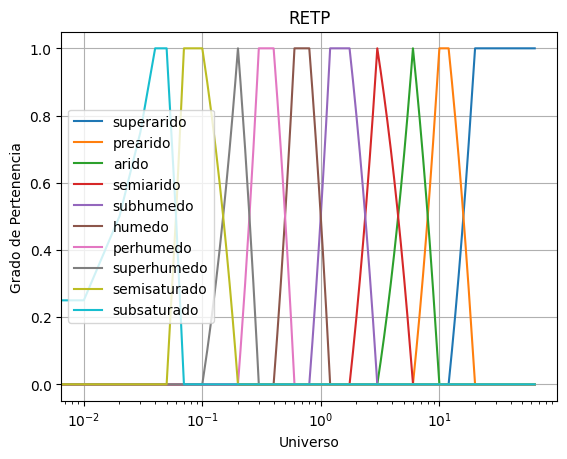

In [5]:
# Graficar
for conjunto, label in zip(retp, labels):
    plt.plot(universo, conjunto, label=label)

# Etiquetas y título
plt.title('RETP')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

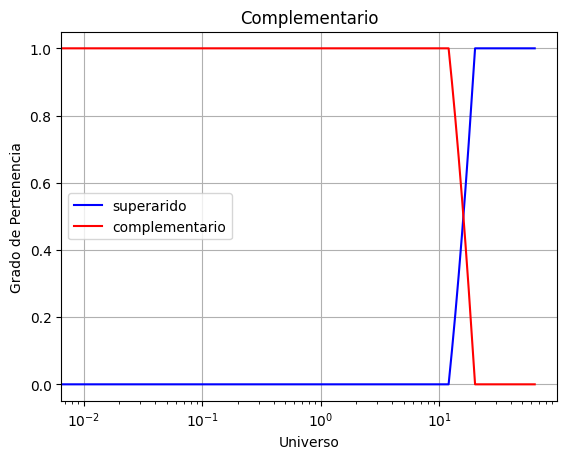

In [6]:
superarido_comp = fuzz.fuzzy_not(superarido)
# Graficar
plt.plot(universo, superarido, label="superarido", color='blue')
plt.plot(universo, superarido_comp, label="complementario", color='red')


# Etiquetas y título
plt.title('Complementario')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


In [7]:
valores = [10, 20, 30]
pertenencia = [[ fuzz.interp_membership(universo,conjunto, x) for conjunto in retp] for x in valores]
pertenencia

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

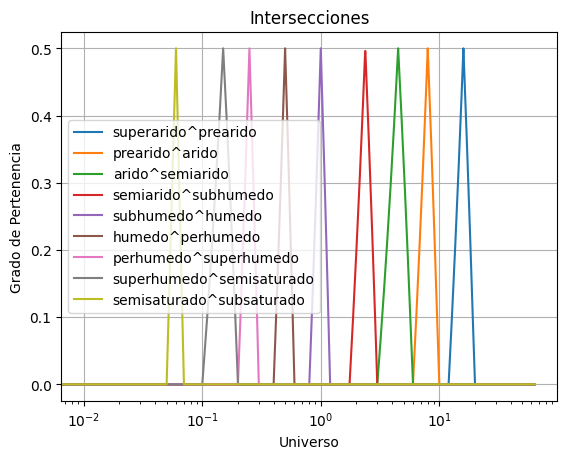

In [8]:
for i in range(len(retp)-1):
    interseccion = fuzz.fuzzy_and(universo,retp[i],universo,retp[i+1])[1] #no olvidar!!!!
    plt.plot(universo, interseccion, label=labels[i] + "^" + labels[i+1])

# Etiquetas y título
plt.title('Intersecciones')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

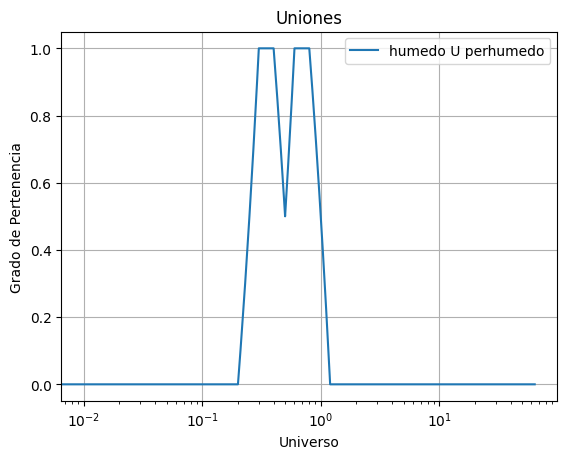

In [9]:
i = 5    
union = fuzz.fuzzy_or(universo,retp[i],universo,retp[i+1])[1] #no olvidar!!!!
plt.plot(universo, union, label=labels[i] + " U " + labels[i+1])

# Etiquetas y título
plt.title('Uniones')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [36]:
universo_lat=np.arange(0,90.01,1)
universo_lat

tropical = fuzz.trapmf(universo_lat, [0, 6, 10, 13])
subtropical = fuzz.trapmf(universo_lat, [13, 20, 25, 27.30])
templadoCalido = fuzz.trapmf(universo_lat, [27.30, 35, 40, 42])
templadoFrio = fuzz.trapmf(universo_lat, [42, 50, 55, 58.30])
boreal = fuzz.trapmf(universo_lat, [58.30, 60, 62, 63.48])
subpolar = fuzz.trapmf(universo_lat, [63.48, 64, 66, 68])
polar = fuzz.trapmf(universo_lat, [68, 73, 87, 90])
lat = [tropical, subtropical, templadoCalido, templadoFrio, boreal, subpolar, polar]
labelslat = ["tropical", "subtropical", "templadoCalido", "templadoFrio", "boreal", "subpolar", "polar"]

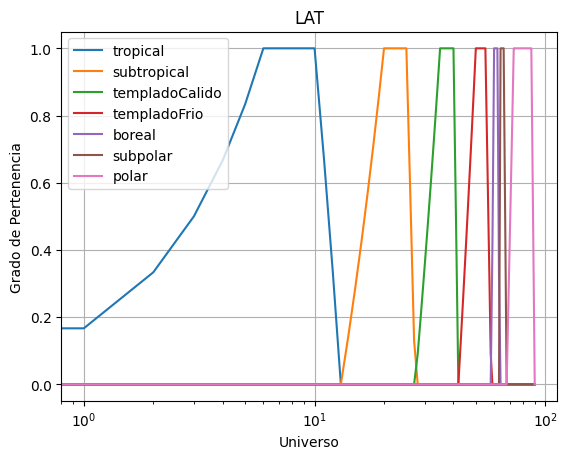

In [37]:
# Graficar
for conjunto, label in zip(lat, labelslat):
    plt.plot(universo_lat, conjunto, label=label)

# Etiquetas y título
plt.title('LAT')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [62]:
universo_alt=np.arange(0,5000,150)
universo_alt

basal = fuzz.trapmf(universo_alt, [0, 50, 600, 1000])
premontano = fuzz.trapmf(universo_alt, [1000, 1200, 1800, 2000])
montanoBajo = fuzz.trapmf(universo_alt, [2000, 2200, 2800, 3000])
montano = fuzz.trapmf(universo_alt, [3000, 3200, 3800, 4000])
subalpino = fuzz.trapmf(universo_alt, [4000, 4100, 4400, 4500])
alpino = fuzz.trapmf(universo_alt, [4500, 4550, 4650, 4750])
nival = fuzz.trapmf(universo_alt, [4750, 4850, 4950, 5000])
alt = [basal, premontano, montanoBajo, montano, subalpino, alpino, nival]
labelsalt = ["basal", "premontano", "montanoBajo", "montano", "subalpino", "alpino", "nival"]

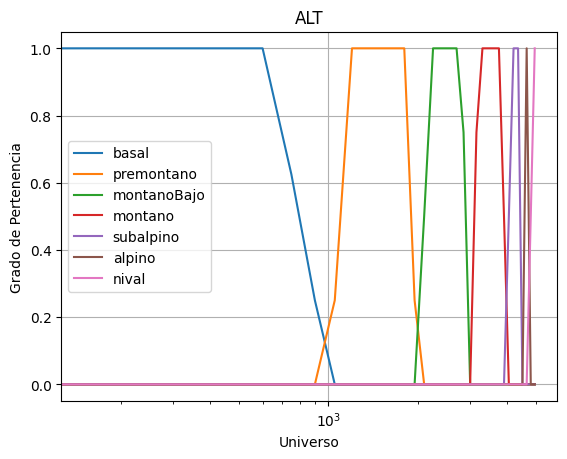

In [63]:
# Graficar
for conjunto, label in zip(alt, labelsalt):
    plt.plot(universo_alt, conjunto, label=label)

# Etiquetas y título
plt.title('ALT')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [74]:
universoPP=np.arange(0,16000,60)
universoPP

semisaturado = fuzz.trapmf(universoPP, [0, 0, 0, 0])
subsaturado = fuzz.trapmf(universoPP, [0, 10, 55, 62.5])
superarido = fuzz.trapmf(universoPP, [62.5, 70, 110, 125])
prearido = fuzz.trapmf(universoPP, [110, 125, 200, 250])
arido = fuzz.trapmf(universoPP, [250, 300, 400, 500])
semiarido = fuzz.trapmf(universoPP, [400, 500, 900, 1000])
subhumedo = fuzz.trapmf(universoPP, [900, 1000, 1800, 2000])
humedo = fuzz.trapmf(universoPP, [1800, 2000, 3800, 4000])
perhumedo = fuzz.trapmf(universoPP, [3800, 4000, 7500, 8000])
superhumedo = fuzz.trapmf(universoPP, [7500, 8000, 15000, 16000])
pp = [superarido, prearido, arido, semiarido, subhumedo, humedo, perhumedo, superhumedo, semisaturado, subsaturado]
labelspp = ["superarido", "prearido", "arido", "semiarido", "subhumedo", "humedo", "perhumedo", "superhumedo", "semisaturado", "subsaturado"]

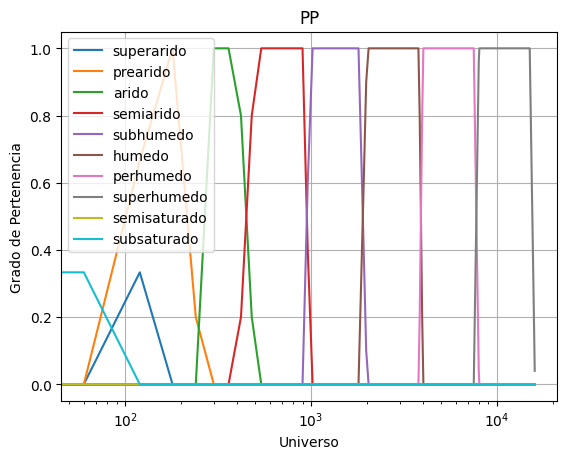

In [75]:
# Graficar
for conjunto, label in zip(pp, labelspp):
    plt.plot(universoPP, conjunto, label=label)

# Etiquetas y título
plt.title('PP')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [78]:
universo_bt=np.arange(0,30,0.5)
universo_bt

tropical = fuzz.trapmf(universo_bt, [24, 24.5, 29.5, 30])
subtropical = fuzz.trapmf(universo_bt, [18, 18.5, 23.5, 24])
templadoCalido = fuzz.trapmf(universo_bt, [12, 12.5, 17.5, 18])
templadoFrio = fuzz.trapmf(universo_bt, [6, 6.5, 11.5, 12])
boreal = fuzz.trapmf(universo_bt, [3, 3.5, 5.5, 6])
subpolar = fuzz.trapmf(universo_bt, [1.3, 1.5, 2.5, 3])
polar = fuzz.trapmf(universo_bt, [0, 0.2, 1, 1.3])
bt = [tropical, subtropical, templadoCalido, templadoFrio, boreal, subpolar, polar]
labelsbt = ["tropical", "subtropical", "templadoCalido", "templadoFrio", "boreal", "subpolar", "polar"]

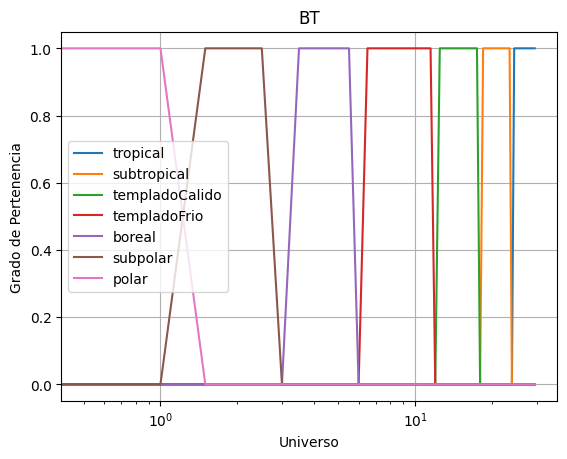

In [79]:
# Graficar
for conjunto, label in zip(bt, labelsbt):
    plt.plot(universo_bt, conjunto, label=label)

# Etiquetas y título
plt.title('BT')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Universo de discurso para Altitud
x_alt = np.arange(0, 5000, 10)

# Definir las funciones de pertenencia trapezoidales para cada piso altitudinal
alt_nival = fuzz.trapmf(x_alt, [4000, 4200, 5000, 5000])
alt_alpino = fuzz.trapmf(x_alt, [3000, 3200, 4000, 4200])
alt_subalpino = fuzz.trapmf(x_alt, [2500, 2700, 3200, 3500])
alt_montano = fuzz.trapmf(x_alt, [1500, 1800, 2700, 3000])
alt_montano_bajo = fuzz.trapmf(x_alt, [1000, 1200, 1800, 2000])
alt_premontano = fuzz.trapmf(x_alt, [500, 700, 1200, 1500])
alt_basal = fuzz.trapmf(x_alt, [0, 0, 500, 700])

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Definir el universo de discurso para las variables
x_tm = np.arange(-10, 50, 0.1)  # Universo de discurso para la temperatura media mensual
x_lat = np.arange(0, 90, 0.1)    # Universo de discurso para la latitud
x_btm = np.arange(-10, 50, 0.1)  # Universo de discurso para la biotemperatura mensual

# Definir las variables difusas
Tm = ctrl.Antecedent(x_tm, 'Tm')
LAT = ctrl.Antecedent(x_lat, 'LAT')
BTm = ctrl.Consequent(x_btm, 'BTm')

# Definir las funciones de pertenencia para Tm (temperatura media mensual)
Tm['baja'] = fuzz.trimf(Tm.universe, [-10, 0, 6])
Tm['moderada'] = fuzz.trimf(Tm.universe, [6, 15, 24])
Tm['alta'] = fuzz.trapmf(Tm.universe, [24, 30, 50, 50])

# Definir las funciones de pertenencia para LAT (latitud)
LAT['polar'] = fuzz.trapmf(LAT.universe, [60, 70, 90, 90])
LAT['subpolar'] = fuzz.trapmf(LAT.universe, [50, 55, 65, 70])
LAT['boreal'] = fuzz.trapmf(LAT.universe, [40, 45, 55, 60])
LAT['templada_fria'] = fuzz.trapmf(LAT.universe, [30, 35, 45, 50])
LAT['templada_calida'] = fuzz.trapmf(LAT.universe, [20, 25, 35, 40])
LAT['subtropical'] = fuzz.trapmf(LAT.universe, [10, 15, 25, 30])
LAT['tropical'] = fuzz.trapmf(LAT.universe, [0, 0, 10, 15])

# Definir las funciones de pertenencia para BTm (biotemperatura mensual)
BTm['muy_baja'] = fuzz.trimf(BTm.universe, [0, 0, 5])
BTm['baja'] = fuzz.trimf(BTm.universe, [5, 10, 15])
BTm['moderada'] = fuzz.trimf(BTm.universe, [15, 20, 25])
BTm['alta'] = fuzz.trimf(BTm.universe, [25, 30, 35])
BTm['muy_alta'] = fuzz.trimf(BTm.universe, [35, 40, 50])

# Definir las reglas difusas
rule1 = ctrl.Rule(Tm['baja'], BTm['muy_baja'])
rule2 = ctrl.Rule(Tm['moderada'], BTm['moderada'])
rule3 = ctrl.Rule(Tm['alta'] & LAT['tropical'], BTm['muy_alta'])
rule4 = ctrl.Rule(Tm['alta'] & LAT['subtropical'], BTm['alta'])
rule5 = ctrl.Rule(Tm['alta'] & LAT['templada_calida'], BTm['moderada'])
rule6 = ctrl.Rule(Tm['alta'] & LAT['templada_fria'], BTm['baja'])
rule7 = ctrl.Rule(Tm['alta'] & LAT['boreal'], BTm['muy_baja'])
rule8 = ctrl.Rule(Tm['alta'] & LAT['subpolar'], BTm['muy_baja'])
rule9 = ctrl.Rule(Tm['alta'] & LAT['polar'], BTm['muy_baja'])

# Crear el sistema de control difuso
biotemp_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
biotemp_sim = ctrl.ControlSystemSimulation(biotemp_ctrl)

# Calcular la biotemperatura mensual para cada valor de Tm y LAT
Tm_values = [5, 15, 28, 20, 30, 12, -5, 21, 30]  # Ejemplo de temperaturas medias mensuales
LAT_values = [5, 15, 28, 35, 45, 55, 65, 75, 85]  # Ejemplo de latitudes

BTm_values = []
for Tm_val, LAT_val in zip(Tm_values, LAT_values):
    biotemp_sim.input['Tm'] = Tm_val
    biotemp_sim.input['LAT'] = LAT_val
    biotemp_sim.compute()
    BTm_values.append(biotemp_sim.output['BTm'])

# Calcular la biotemperatura anual, limitando valores extremos
BT_anual = np.mean([max(0, min(30, val)) for val in BTm_values])

print("Biotemperatura mensual:", BTm_values)
print("Biotemperatura anual:", BT_anual)